# TEXT CLASSIFICATION

# Data Survivor
## Anggota:
1. Alexander Patrick Surjono
2. Ramzy Mohammad
3. Retno Dewi Yulianti
4. Stella Linda Cyrilla
5. Wahyu Tri Utomo

Dataset Resource: https://drive.google.com/drive/folders/13YkQF8A1bD_xNrqBv2lGk7ziM3d24OLd

Dataset yang akan dipakai adalah<br>
1.Bisnis<br>
-. Row = 40 dan Column = 5<br>
2.Sport<br>
-. Row = 40 dan Column = 5<br>
3.Life Style<br>
-. Row = 40 dan Column = 5<br>

Fitur:
- Unnamed
- id = nomer index pada dataset
- url = link/url website berita
- title = judul berita
- content = isi dari berita


# Algoritma Pertama

# Install Package yang diperlukan

In [ ]:
!pip install nltk
!pip install Sastrawi

# Import Package yang diperlukan

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#import data and preprocessing
import pandas as pd
import re
import string
from string import punctuation
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')   #stopwords bisa ditambah dengan append

#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#nodelling
from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.linear_model import LogisticRegression

#evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset yang akan digunakan

In [ ]:
url_sport="https://drive.google.com/file/d/1pcnPVr_lWiKXASy9tSbyM7hQyDI2ysec/view?usp=sharing"
url_bisnis="https://drive.google.com/file/d/1Q6M0IjUwsr-BY9u21wDlN8VHQCLaobSL/view?usp=sharing"
url_lifestyle="https://drive.google.com/file/d/1SIMxnQGat_P0qRbyFBkgkEFsPEX3hThO/view?usp=sharing"

sport_path = 'https://drive.google.com/uc?export=download&id='+url_sport.split('/')[-2]
bisnis_path = 'https://drive.google.com/uc?export=download&id='+url_bisnis.split('/')[-2]
lifestyle_path = 'https://drive.google.com/uc?export=download&id='+url_lifestyle.split('/')[-2]

sport = pd.read_csv(sport_path)
bisnis = pd.read_csv(bisnis_path)
life_style = pd.read_csv(lifestyle_path)

In [ ]:
sport.head(1)

,Unnamed: 0,id,url,title,content
0,0,0,https://www.tribunnews.com/sport/2020/10/06/za...,\n\t\t\t\t\t\tZainudin Amali Beberkan Alasan B...,"b'Laporan Wartawan Tribunnews.com, Abdul Majid..."


In [ ]:
sport = sport[['content']]
bisnis = bisnis[['content']]
life_style = life_style[['content']]

In [ ]:
sport['label'] = 'sport'
bisnis['label'] = 'bisnis'
life_style['label'] = 'lifestyle'

In [ ]:
sport.head(1)

,content,label
0,"b'Laporan Wartawan Tribunnews.com, Abdul Majid...",sport


In [ ]:
df = sport.append(bisnis)

In [ ]:
df

,content,label
0,"b'Laporan Wartawan Tribunnews.com, Abdul Majid...",sport
1,b'TRIBUNNEWS.COM - Jadwal siaran langsung Moto...,sport
2,b'TRIBUNNEWS.COM - Live streaming Trans7 MotoG...,sport
3,b'TRIBUNNEWS.COM - Muhammad Ali secara mengeju...,sport
4,b'TRIBUNNEWS.COM - Live streaming Trans7 MotoG...,sport
...,...,...
35,"b'Laporan Wartawan Tribunnews.com, Reynas Abdi...",bisnis
36,"b'TRIBUNNEWS.COM, JAKARTA - PT Internusa Keram...",bisnis
37,"b'\xc2\xa0 TRIBUNNEWS.COM, JAKARTA - Sidang Pa...",bisnis
38,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",bisnis


In [ ]:
df1 = df.append(life_style)

In [ ]:
df1

,content,label
0,"b'Laporan Wartawan Tribunnews.com, Abdul Majid...",sport
1,b'TRIBUNNEWS.COM - Jadwal siaran langsung Moto...,sport
2,b'TRIBUNNEWS.COM - Live streaming Trans7 MotoG...,sport
3,b'TRIBUNNEWS.COM - Muhammad Ali secara mengeju...,sport
4,b'TRIBUNNEWS.COM - Live streaming Trans7 MotoG...,sport
...,...,...
35,b'TRIBUNNEWS.COM -\xc2\xa0Kombinasi es buah de...,lifestyle
36,b'TRIBUNNEWS.COM - Kulit tangan kusam dan biki...,lifestyle
37,b'TRIBUNNEWS.COM -\xc2\xa0Pasti semua setuju j...,lifestyle
38,b'TRIBUNNEWS.COM - Berikut 30 arti mimpi yang ...,lifestyle


In [ ]:
df1.reset_index(inplace=True)
df1 = df1[['content', 'label']]

In [ ]:
df1

,content,label
0,"b'Laporan Wartawan Tribunnews.com, Abdul Majid...",sport
1,b'TRIBUNNEWS.COM - Jadwal siaran langsung Moto...,sport
2,b'TRIBUNNEWS.COM - Live streaming Trans7 MotoG...,sport
3,b'TRIBUNNEWS.COM - Muhammad Ali secara mengeju...,sport
4,b'TRIBUNNEWS.COM - Live streaming Trans7 MotoG...,sport
...,...,...
115,b'TRIBUNNEWS.COM -\xc2\xa0Kombinasi es buah de...,lifestyle
116,b'TRIBUNNEWS.COM - Kulit tangan kusam dan biki...,lifestyle
117,b'TRIBUNNEWS.COM -\xc2\xa0Pasti semua setuju j...,lifestyle
118,b'TRIBUNNEWS.COM - Berikut 30 arti mimpi yang ...,lifestyle


# Cek Imbalance Data

In [ ]:
df1.label.value_counts()

lifestyle    40
bisnis       40
sport        40
Name: label, dtype: int64

Karena sample dari setiap label memiliki jumlah yang sama banyak maka Resampling tidak diperlukan

# Text Preprocessing

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
#preprocessing function
stop_words.append('b\'TRIBUNNEWS.COM')
stop_words.append('btribunnewscom')
stop_words.append('tribunnewscom')
def preprocessing(sentence):
    
    #lowecasing
    sentence = sentence.lower()
    
    #remove white spaces
    sentence = sentence.strip()
    
    #tokenization
    words = word_tokenize(sentence)
    
    #remove punctuation/ special character
    remove_table = str.maketrans("", "", punctuation)
    words = [x.translate(remove_table) for x in words]
    
    #remove nonalphanumeric <=3 chars
    words = [x for x in words if x.isalnum() and len(x) > 3]
    
    ######
    cek = []
    for i in words:
        if i[0] != 'x':  #xcaku
            cek.append(i)
    
    ####
#     for k in cek:
    char_list = ['xc2xa0', 'blaporan'] # xc2xa0adalah
    res = [ele for ele in cek if all(ch not in ele for ch in char_list)]

    
    #remove stopwords
    words = [x for x in res if x not in stop_words]
    #rejoining the words
    sentence = " ".join(words)
    
    return sentence

In [ ]:
df1['content'] = [preprocessing(stc) for stc in df1['content']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1

,content,label
0,wartawan abdul majid jakarta menteri pemuda ol...,sport
1,jadwal siaran langsung motogp prancis 2020 sir...,sport
2,live streaming trans7 motogp prancis 2020 sirk...,sport
3,muhammad mengejutkan tertinggi daftar petinju ...,sport
4,live streaming trans7 motogp jelang prancis 20...,sport
...,...,...
115,buah kelapa bikin ketagihan beli coba rumah bu...,lifestyle
116,kulit tangan kusam bikin percaya khawatir coba...,lifestyle
117,setuju bayam salah sayuran favorit keluarga ba...,lifestyle
118,arti mimpi berhubungan gaib orang merasakan mi...,lifestyle


# Dataset Splitting

In [ ]:
X = df1.content
y = df1.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96,), (24,), (96,), (24,))

In [ ]:
X_train

48     wartawan tribunnews choirul arifin jakarta peg...
46     pasokan listrik kehidupan kegiatan lakukan mem...
21     keuntungan menunggu valentino rossi merapat sa...
38     ajang balapan motogp 2020 digelar pekan minggu...
35     ajang balapan motogp 2020 digelar pekan minggu...
                             ...                        
112    takut kelebihan baking soda dapur membeli baki...
26     presiden dana white mengaku hasrat menggelar d...
99     btribunamboncom ramalan zodiak selasa oktober ...
41     wartawan yanuar riezqi yovanda jakarta investo...
110    kumpulan resep martabak terang mudah cepat mar...
Name: content, Length: 96, dtype: object

In [ ]:
y_train

48        bisnis
46        bisnis
21         sport
38         sport
35         sport
         ...    
112    lifestyle
26         sport
99     lifestyle
41        bisnis
110    lifestyle
Name: label, Length: 96, dtype: object

In [ ]:
y_train = y_train.map({'bisnis':0, 'sport':1, 'lifestyle':2})

In [ ]:
y_test = y_test.map({'bisnis':0, 'sport':1, 'lifestyle':2})

# Training dengan Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
# from jcopml.tuning import random_search_params as rsp

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer()), 
    ('algo', LogisticRegression(multi_class='multinomial',solver='lbfgs', n_jobs=-1, random_state=42))
])

logreg_params = {
    'algo__fit_intercept': [True, False]
  
}

model = RandomizedSearchCV(pipeline, logreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1) # Default scoring= 'Accuracy'
model.fit(X_train, y_train) # training

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'algo__fit_intercept': False}
1.0 0.9375 0.9166666666666666


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.7s finished


In [ ]:
# print(classification_report(y_test2,predicted_lr2))

logit_tuned_pred = model.predict(X_test)
logit_tuned_proba = model.predict_proba(X_test)

In [ ]:
logit_tuned_pred

array([1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0,
       0, 0])

In [ ]:
print(classification_report(y_test,logit_tuned_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      1.00      1.00         8
           2       1.00      0.75      0.86         8

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [ ]:
confusion_matrix(logit_tuned_pred, y_test)

array([[8, 0, 2],
       [0, 8, 0],
       [0, 0, 6]])

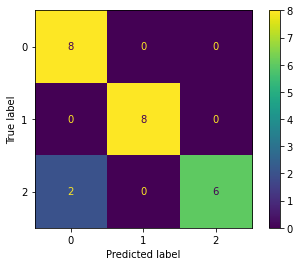

In [ ]:
plot_confusion_matrix(model , X_test, y_test)

# -------------------------------------------------------------------------

# Algoritma Kedua

# Load Dataset yang digunakan

In [ ]:
sport = pd.read_csv(sport_path)
bisnis = pd.read_csv(bisnis_path)
life_style = pd.read_csv(lifestyle_path)

In [ ]:
sport = sport[['content']]
bisnis = bisnis[['content']]
life_style = life_style[['content']]

In [ ]:
sport['label'] = 'sport'
bisnis['label'] = 'bisnis'
life_style['label'] = 'lifestyle'

In [ ]:
df = sport.append(bisnis)

In [ ]:
df1 = df.append(life_style)

In [ ]:
df1.reset_index(inplace=True)
df1 = df1[['content', 'label']]

In [ ]:
df1

,content,label
0,"b'Laporan Wartawan Tribunnews.com, Abdul Majid...",sport
1,b'TRIBUNNEWS.COM - Jadwal siaran langsung Moto...,sport
2,b'TRIBUNNEWS.COM - Live streaming Trans7 MotoG...,sport
3,b'TRIBUNNEWS.COM - Muhammad Ali secara mengeju...,sport
4,b'TRIBUNNEWS.COM - Live streaming Trans7 MotoG...,sport
...,...,...
115,b'TRIBUNNEWS.COM -\xc2\xa0Kombinasi es buah de...,lifestyle
116,b'TRIBUNNEWS.COM - Kulit tangan kusam dan biki...,lifestyle
117,b'TRIBUNNEWS.COM -\xc2\xa0Pasti semua setuju j...,lifestyle
118,b'TRIBUNNEWS.COM - Berikut 30 arti mimpi yang ...,lifestyle


# Text Preprocessing

In [ ]:
#preprocessing function
stop_words.append('b\'TRIBUNNEWS.COM')
stop_words.append('btribunnewscom')
stop_words.append('tribunnewscom')
def preprocessing(sentence):
    
    #lowecasing
    sentence = sentence.lower()
    
    #remove white spaces
    sentence = sentence.strip()
    
    #tokenization
    words = word_tokenize(sentence)
    
    #remove punctuation/ special character
    remove_table = str.maketrans("", "", punctuation)
    words = [x.translate(remove_table) for x in words]
    
    #remove nonalphanumeric <=3 chars
    words = [x for x in words if x.isalnum() and len(x) > 3]
    
    ######
    cek = []
    for i in words:
        if i[0] != 'x':
            cek.append(i)
    
    ####
#     for k in cek:
    char_list = ['xc2xa0', 'blaporan']
    res = [ele for ele in cek if all(ch not in ele for ch in char_list)]

    
    #remove stopwords
    words = [x for x in res if x not in stop_words]
    #rejoining the words
    sentence = " ".join(words)
    
    return sentence

In [ ]:
df1['content'] = [preprocessing(stc) for stc in df1['content']]

In [ ]:
df1

,content,label
0,wartawan abdul majid jakarta menteri pemuda ol...,sport
1,jadwal siaran langsung motogp prancis 2020 sir...,sport
2,live streaming trans7 motogp prancis 2020 sirk...,sport
3,muhammad mengejutkan tertinggi daftar petinju ...,sport
4,live streaming trans7 motogp jelang prancis 20...,sport
...,...,...
115,buah kelapa bikin ketagihan beli coba rumah bu...,lifestyle
116,kulit tangan kusam bikin percaya khawatir coba...,lifestyle
117,setuju bayam salah sayuran favorit keluarga ba...,lifestyle
118,arti mimpi berhubungan gaib orang merasakan mi...,lifestyle


# Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1['content'], df1['label'], test_size=0.25, stratify=df1['label'])

In [ ]:
X_train

100    wartawan sutriyanto jakarta adelle jewellery m...
74     wartawan yanuar riezqi yovanda jakarta undangu...
109    zodiak aries taurus gemini cancer virgo libra ...
114    percaya poripori wajah poripori penampilan men...
8      live onlinetrans7 motogp prancis 2020 sirkuit ...
                             ...                        
48     wartawan tribunnews choirul arifin jakarta peg...
87     abon merek bradtalk main terkenalnya roti boom...
32     ajang balapan motogp 2020 digelar pekan minggu...
47     wartawan reynas abdila jakarta pandemi covid19...
68     simak klaim token listrik gratis diskon oktobe...
Name: content, Length: 90, dtype: object

In [ ]:
y_train

100    lifestyle
74        bisnis
109    lifestyle
114    lifestyle
8          sport
         ...    
48        bisnis
87     lifestyle
32         sport
47        bisnis
68        bisnis
Name: label, Length: 90, dtype: object

# Feature Extraction dengan Bag of Words

In [ ]:
cv = CountVectorizer(lowercase = True, stop_words = stop_words,token_pattern="[A-Za-z]+")

X_train_vect2 = cv.fit_transform(X_train)
X_test_vect2 = cv.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'baiknya', 'berkali', 'com', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya', 'tribunnews'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
y_train

100    lifestyle
74        bisnis
109    lifestyle
114    lifestyle
8          sport
         ...    
48        bisnis
87     lifestyle
32         sport
47        bisnis
68        bisnis
Name: label, Length: 90, dtype: object

In [ ]:
y_train = y_train.map({'bisnis':0, 'sport':1, 'lifestyle':2})

In [ ]:
y_test = y_test.map({'bisnis':0, 'sport':1, 'lifestyle':2})

# Training dengan SVM

In [ ]:
#modelling with svm #training
SVM = svm.SVC(C=1.0,kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_vect2, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicted2 = SVM.predict(X_test_vect2)

In [ ]:
predicted2

array([2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 0, 2, 1])

In [ ]:
accuracy_score(y_test,predicted2 )

0.9333333333333333

In [ ]:
print(classification_report(y_test,predicted2))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      0.90      0.95        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
confusion_matrix(y_test, predicted2) # 30 data test, 90 data train

array([[ 9,  0,  1],
       [ 0,  9,  1],
       [ 0,  0, 10]])

# Predict


Sumber Berita(Tempo):https://gaya.tempo.co/read/1482219/ingin-lebih-sehat-gaya-hidup-ala-vegetarian-ini-boleh-dicoba/full&view=oka

In [ ]:
#{'bisnis':0, 'sport':1, 'lifestyle':2}

## Predict dengan Logistic Regression

In [ ]:
# dengan menggunkan Logistic Regression
text ="Melakukan diet flexitarian jangan terlalu tergesa-gesa. Meskipun Blatner merekomendasikan pemula memulai dengan dua hari tanpa daging per minggu sebelum pindah ke 3-4 hari dan akhirnya menjadi lima hari tanpa daging setiap minggu. Kunci kesuksesan adalah melakukannya perlahan dan tidak langsung mengurangi. Pertama, cobalah untuk mengubah salah satu makanan harian menjadi nabati. Kemudian, setelah beberapa waktu, beralihlah ke pola makan vegetarian satu hari dalam seminggu"


In [ ]:
contoh = preprocessing(text)
text3 = []
text3.append(contoh)

In [ ]:
text3

['diet flexitarian tergesagesa blatner merekomendasikan pemula daging minggu pindah daging minggu kunci kesuksesan melakukannya perlahan langsung mengurangi cobalah mengubah salah makanan harian nabati beralihlah pola makan vegetarian seminggu']

In [ ]:
hasil = model.predict(text3)
if hasil == 0:
    print("Berita tersebut masuk ke Topik 'Bisnis'")
elif hasil ==1:
    print("Berita tersebut masuk ke Topik 'Sport'")
elif hasil == 2:
    print("Berita tersebut masuk ke Topik 'Life Style'")

Berita tersebut masuk ke Topik 'Life Style'


## Predict dengan SVM

In [ ]:
coba = cv.transform(text3)
hasil = SVM.predict(coba)
if hasil == 0:
    print("Berita tersebut masuk ke Topik 'Bisnis'")
elif hasil ==1:
    print("Berita tersebut masuk ke Topik 'Sport'")
elif hasil == 2:
    print("Berita tersebut masuk ke Topik 'Life Style'")

Berita tersebut masuk ke Topik 'Life Style'


# Thank You